In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amjadzhour/car-price-prediction")

print("Path to dataset files:", path)

C:\Users\rkchi\miniconda3\envs\Hello-World\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\rkchi\.cache\kagglehub\datasets\amjadzhour\car-price-prediction\versions\1


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
path = r"C:\Users\rkchi\.cache\kagglehub\datasets\amjadzhour\car-price-prediction\versions\1\Car_Price_Prediction.csv"

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
file=pd.read_csv(path)
print(file)

       Make    Model  Year  Engine Size  Mileage Fuel Type Transmission  \
0     Honda  Model B  2015          3.9    74176    Petrol       Manual   
1      Ford  Model C  2014          1.7    94799  Electric    Automatic   
2       BMW  Model B  2006          4.1    98385  Electric       Manual   
3     Honda  Model B  2015          2.6    88919  Electric    Automatic   
4     Honda  Model C  2004          3.4   138482    Petrol    Automatic   
..      ...      ...   ...          ...      ...       ...          ...   
995  Toyota  Model D  2002          1.9     5445    Petrol       Manual   
996   Honda  Model B  2020          3.1   149112    Diesel       Manual   
997    Ford  Model C  2008          1.9   195387    Petrol    Automatic   
998  Toyota  Model A  2003          4.4      246    Petrol    Automatic   
999    Audi  Model C  2020          2.1    31153    Diesel    Automatic   

            Price  
0    30246.207931  
1    22785.747684  
2    25760.290347  
3    25638.003491  

In [5]:
file.shape

(1000, 8)

In [6]:
file.head(5)

Make    Model  Year  Engine Size  Mileage Fuel Type Transmission  \
0  Honda  Model B  2015          3.9    74176    Petrol       Manual   
1   Ford  Model C  2014          1.7    94799  Electric    Automatic   
2    BMW  Model B  2006          4.1    98385  Electric       Manual   
3  Honda  Model B  2015          2.6    88919  Electric    Automatic   
4  Honda  Model C  2004          3.4   138482    Petrol    Automatic   

          Price  
0  30246.207931  
1  22785.747684  
2  25760.290347  
3  25638.003491  
4  21021.386657

In [7]:

print("\nBasic Statistics:")
display(file.describe())


Basic Statistics:


Year  Engine Size       Mileage         Price
count  1000.000000  1000.000000    1000.00000   1000.000000
mean   2010.688000     2.798300   97192.48700  25136.615530
std       6.288577     1.024137   59447.31576   5181.401368
min    2000.000000     1.000000      56.00000   6704.953524
25%    2005.000000     1.900000   44768.75000  21587.878370
50%    2011.000000     2.800000   94411.50000  25189.325247
75%    2016.000000     3.700000  148977.75000  28806.368974
max    2021.000000     4.500000  199867.00000  41780.504635

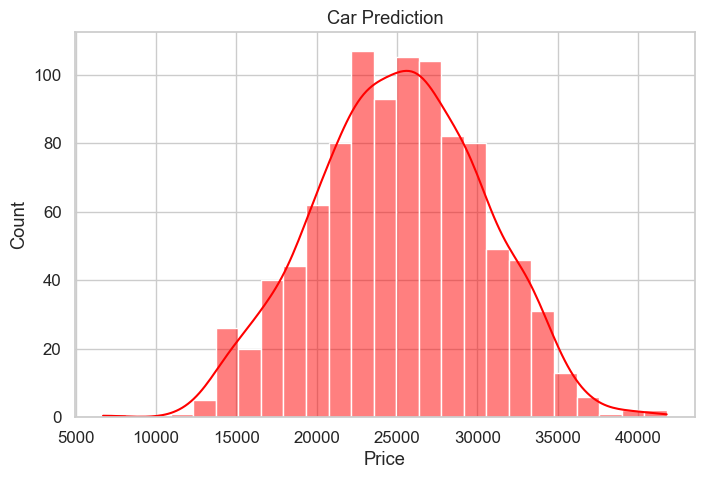

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(file['Price'],kde=True,color='red')
plt.title("Car Prediction")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


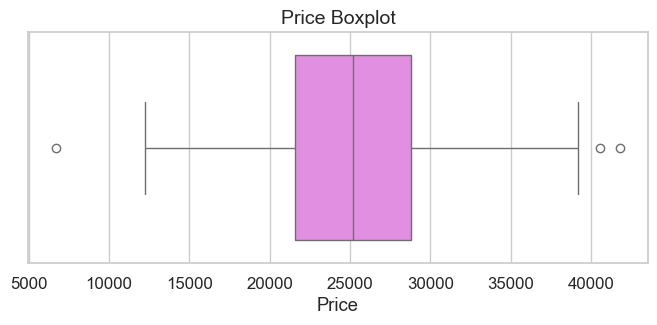

In [9]:

# Boxplot for Price (to check outliers)
plt.figure(figsize=(8,3))
sns.boxplot(x=file['Price'], color='violet')
plt.title("Price Boxplot", fontsize=14)
plt.show()

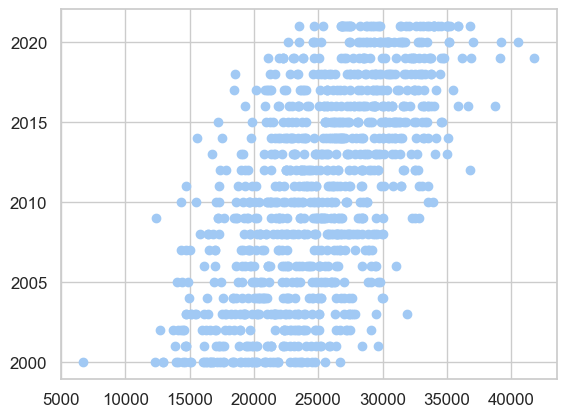

In [10]:
plt.scatter(file.Price,file.Year)
plt.show()

In [14]:
def loss_function(m,b,points):
    total_error=0
    for i in range(points):
        x=file.iloc[i].Price
        y=file.iloc[i].Year
        total_error+=(y-(m*x+b))**2
    total_error=total_error/float(len(points))


def gradient_descent(mi,bi,L,points):
    m_gradient=0;
    b_gradient=0

    for i in range(len(points)):
        x=file.iloc[i].Price
        y=file.iloc[i].Mileage
        m_gradient +=-(2/len(points))* x * (y-(mi*x+bi))
        b_gradient +=-(2/len(points)) * (y-(mi*x+bi))

    m= mi-m_gradient*L
    b= bi-b_gradient*L
    return m,b
    

# Gradients of the Cost Function

For a simple linear regression model \(y = mx + b\), the cost function \(J(m, b)\) is typically:

The partial derivatives of the cost function \(J(m, b)\) with respect to parameters \(m\) (slope) and \(b\) (intercept) are:

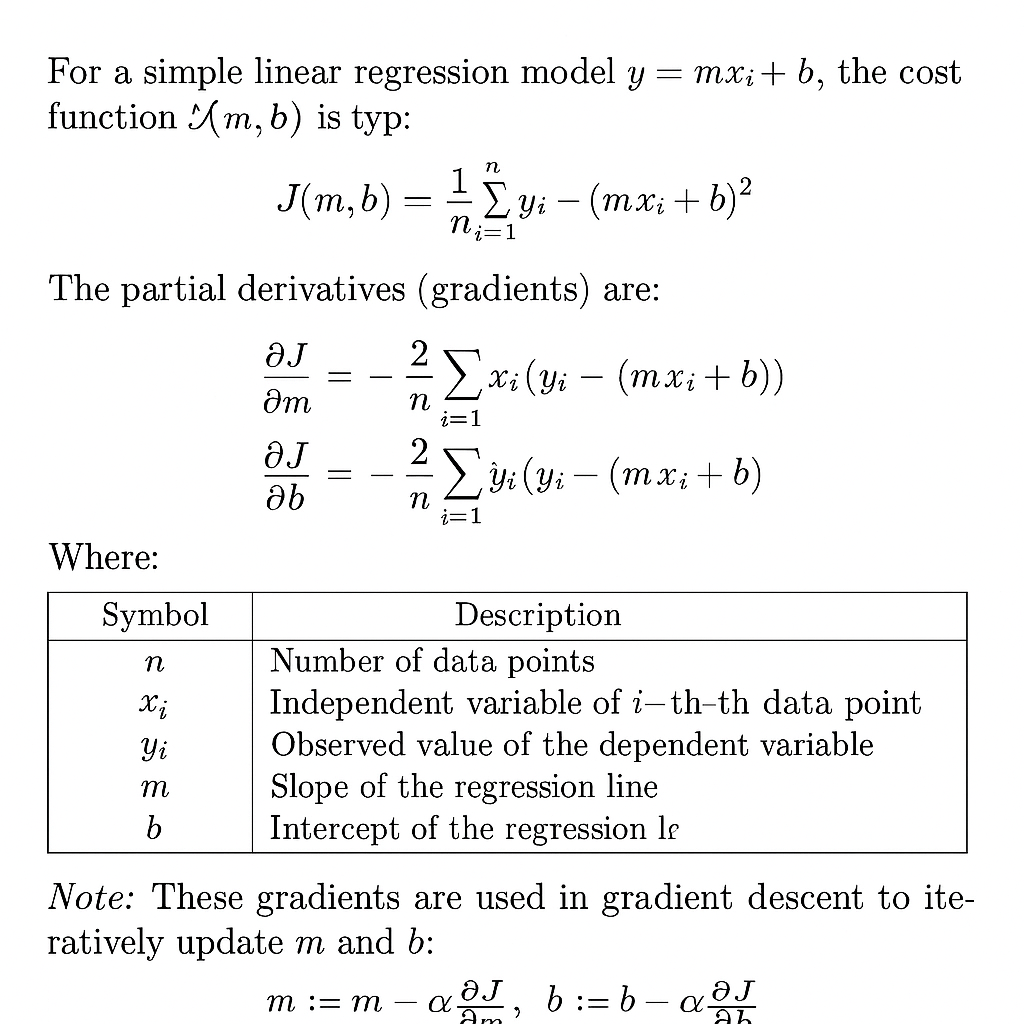


**Where:**  

| Symbol | Description |
|--------|-------------|
| \(n\)  | *Number of data points* |
| \(x_i\) | *Independent variable of the \(i\)-th data point* |
| \(y_i\) | *Observed value of the dependent variable* |
| \(m\)  | *Slope of the regression line* |
| \(b\)  | *Intercept of the regression line* |

*Note:* These gradients are used in **gradient descent** to update \(m\) and \(b\) iteratively:

\[
m := m - \alpha \frac{\partial J}{\partial m}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
\]

where \(\alpha\) is the learning rate.


In [12]:
m=0
b=0
L = 0.00001   # instead of 0.01

epoch=100



for i in range(epoch):
    if i %10==0:
        print(f"{i}")
    m,b=gradient_descent(m,b,L,file)


print("Final slope (m):", m)
print("Final intercept (b):", b)

0
10
20
30
40
50
60
70
80
90
Final slope (m): nan
Final intercept (b): nan


# Linear Equation: \(y = a + bx\)

The linear equation can be expressed as:

<b>y = a + bx </b>


Where:  

- **\(y\)** — *Dependent variable (the outcome we are trying to predict)*.  
- **\(x\)** — *Independent variable (the predictor or input)*.  
- **\(a\)** — *Intercept: The value of \(y\) when \(x = 0)*.  
- **\(b\)** — *Slope: Represents the change in \(y\) for a unit change in \(x)*.  

*Key Concept:* The slope \(b\) determines the steepness of the line, while the intercept \(a\) determines where the line crosses the y-axis.

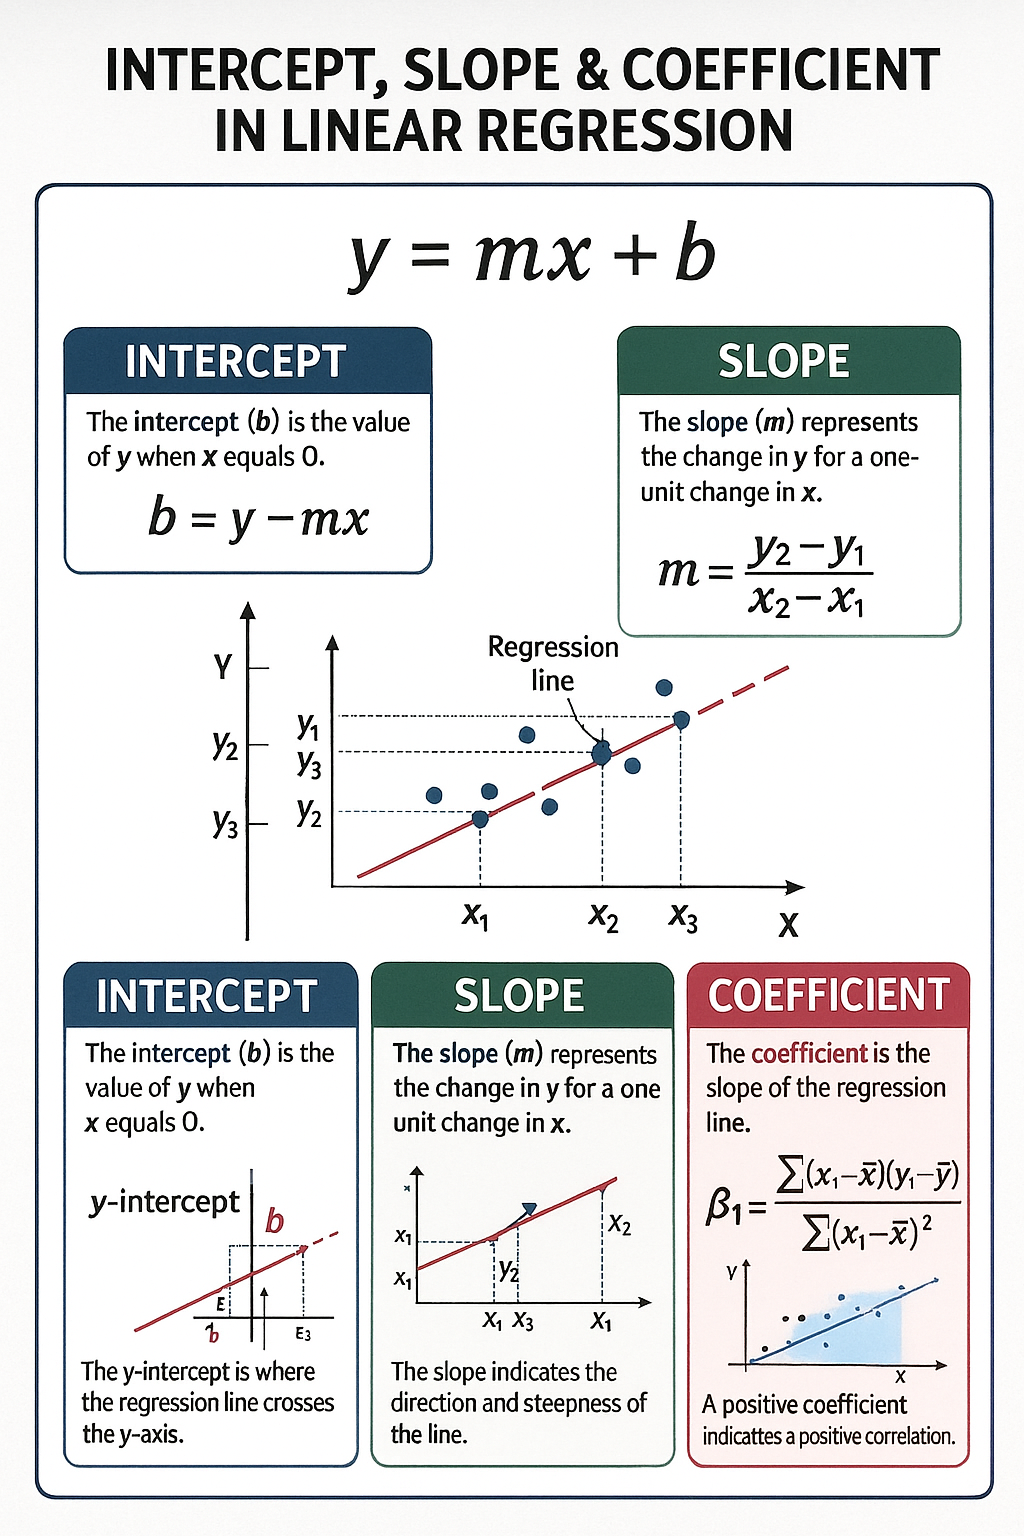


In [1]:
plt.scatter(file.Price,file.Mileage)
plt.plot(list(range(20,80)),  [m*x+b for x in range(20,80) ], color="red")
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.show()

NameError: name 'plt' is not defined